In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
churn_df = pd.read_csv('/Users/anishdulla/Desktop/DataScience/Datasets/telecom_churn_clean.csv')

In [15]:
del churn_df['Unnamed: 0']

In [16]:
churn_df

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


### Train-Test-Split and Computing Accuracy

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [6]:
X = churn_df.drop('churn', axis=1).values
y = churn_df['churn'].values

In [7]:
# Split into training and test sets
# Stratify = y ensures that both the test and training data are representative of the true proportion of labels in the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [8]:
# Fit the classifier to the training data
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

In [12]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.8740629685157422


### Overfitting and Underfitting

In [13]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

In [19]:
for neighbor in neighbors:

    #Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669, 4: 0.8945986496624156, 5: 0.8953488372093024, 6: 0.8893473368342085, 7: 0.8885971492873218, 8: 0.8863465866466617, 9: 0.8870967741935484, 10: 0.8840960240060015, 11: 0.8874718679669917, 12: 0.8837209302325582} 
 {1: 0.7946026986506747, 2: 0.8605697151424287, 3: 0.8500749625187406, 4: 0.8695652173913043, 5: 0.8740629685157422, 6: 0.8650674662668666, 7: 0.8710644677661169, 8: 0.863568215892054, 9: 0.8725637181409296, 10: 0.8665667166416792, 11: 0.8710644677661169, 12: 0.8710644677661169}


### Visualizing Model Complexity

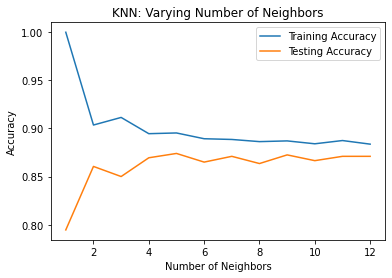

In [30]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, list(train_accuracies.values()), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, list(test_accuracies.values()), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [31]:
print('Accuracy peaks at Optimal K = 7.')

Accuracy peaks at Optimal K = 7.
